In [1]:
import os


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import*


In [3]:
def synthesize1(amplitude,fs,ts):
    components=[CosSignal(freq,amp)
               for amp,freq in zip(amps,fs)]
    signal=SumSignal(*components)
    ys=signal.evaluate(ts)
    return ys
    

In [4]:
amps=np.array([0.6, 0.25, 0.1, 0.05])
fs=[100,200,300,400]
framerate=11025
ts=np.linspace(0,20,framerate)
ys=synthesize1(amps,fs,ts)
wave=Wave(ys,ts,framerate)
wave.apodize()
wave.make_audio()



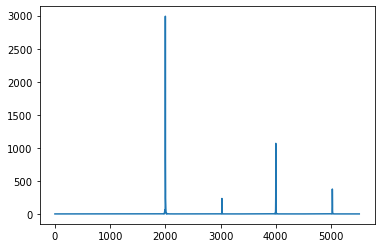

In [5]:
spectrum=wave.make_spectrum()
spectrum.plot()

# Synthesis with arrays

In [6]:
def synthesize2(amp,fs,ts):
    args=np.outer(ts,fs)
    M=np.cos(np.pi*2*args)
    ys=np.dot(M,amps)
    return ys

In [10]:
ys1=synthesize1(amps,fs,ts)
ys2=synthesize2(amps,fs,ts)
max(abs(ys1-ys2))

2.4164004130966532e-12

# Analysis

In [18]:
def analayze1(ys,fs,ts):
    args=np.outer(ts,fs)
    M=np.cos(args*2*np.pi)
    amps=np.linalg.solve(M,ys)
    return amps

In [23]:
n=len(fs)
amps2=analayze1(ys[:n], fs, ts[:n])
amps2

array([0.6 , 0.25, 0.1 , 0.05])

# Orthogonal Matrices 

In [34]:
def test1():
    N=4.0
    time_unit=0.001
    ts=np.arange(N)/N*time_unit
    max_freq=N/time_unit/2
    fs=np.arange(N)/N*max_freq
    ys=synthesize2(amps,fs,ts)
    return ys

In [35]:
test1()

array([1.        , 0.74142136, 0.5       , 0.45857864])

In [46]:
def test1():
    N = 4.0
    time_unit = 0.001
    ts = np.arange(N) / N * time_unit
    max_freq = N / time_unit / 2
    fs = np.arange(N) / N * max_freq
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    return M

M = test1()
M

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  6.12323400e-17,
        -7.07106781e-01],
       [ 1.00000000e+00,  6.12323400e-17, -1.00000000e+00,
        -1.83697020e-16],
       [ 1.00000000e+00, -7.07106781e-01, -1.83697020e-16,
         7.07106781e-01]])

In [47]:
M.transpose().dot(M)

array([[ 4.0000000e+00,  1.0000000e+00, -1.2246468e-16,  1.0000000e+00],
       [ 1.0000000e+00,  2.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [-1.2246468e-16,  1.0000000e+00,  2.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  0.0000000e+00,  1.0000000e+00,  2.0000000e+00]])

In [56]:
def test2():
    N=4.0
    ts=(0.5+np.arange(N))/N
    fs=(0.5+np.arange(N))/2
    args=np.outer(ts,fs)
    M=np.cos(np.pi*2*args)
    return M
sect=test2()
sect

array([[ 0.98078528,  0.83146961,  0.55557023,  0.19509032],
       [ 0.83146961, -0.19509032, -0.98078528, -0.55557023],
       [ 0.55557023, -0.98078528,  0.19509032,  0.83146961],
       [ 0.19509032, -0.55557023,  0.83146961, -0.98078528]])

In [58]:
sect.transpose().dot(sect)


array([[ 2.00000000e+00, -5.55111512e-17,  1.11022302e-16,
         2.22044605e-16],
       [-5.55111512e-17,  2.00000000e+00, -1.66533454e-16,
        -1.11022302e-16],
       [ 1.11022302e-16, -1.66533454e-16,  2.00000000e+00,
        -3.88578059e-16],
       [ 2.22044605e-16, -1.11022302e-16, -3.88578059e-16,
         2.00000000e+00]])